# Power sets in Python: an object-oriented approach (part 3)


## Contents
<style>
  ol
  {
    list-style-type: none
  }
</style>
<ol>
    <li><div style="text-align: left"><a href="#Overview-main"><cn1>Overview</cn1></a></div></li>
    <li><div style="text-align: left"><a href="#Preliminaries-main"><cn1>Preliminaries</cn1></a></li>
    <li><div style="text-align: left"><a href="#Binary-Mask-power-set-generator-main"><cn1>Binary Mask power set generator</cn1></a></div>
    <ol>
        <li><div style="text-align: left"><a href="#Overview-binary"><cn2>Overview</cn2></a></div></li>
        <li><div style="text-align: left"><a href="#Flow-of-control-binary"><cn2>Flow of control</cn2></a></div>
        <ol>
            <li><div style="text-align: left"><a href="#Aside:-initializing-the-mask-binary"><cn3>Aside: initializing the mask<cn3></a></div></li>
        </ol>
        <li><div style="text-align: left"><a href="#Testing-the-binary-mask-routine-binary"><cn2>Testing the binary mask routine</cn2></a></div></li>
    </ol>
    </li>
<li><div style="text-align: left"><a href="#Recursive-power-set-generator-main"><cn1>Recursive power set generator</cn1></a></div>
    <ol>
    <li><div style="text-align: left"><a href="#Overview-recursive"><cn2>Overview</cn2></a></div></li>
    <li><div style="text-align: left"><a href="#Flow-of-control-recursive"><cn2>Flow of control</cn2></a></div></li>
    <li><div style="text-align: left"><a href="#Testing-the-recursive-routine-recursive"><cn2>Testing the recursive routine</cn2></a></div></li>
    </ol>
    </li>
    <li><div style="text-align: left"><a href="#Quick-and-dirty-efficiency-comparison-main"><cn1>Quick-and-dirty efficiency comparison</cn1></div></li>
    <li><div style="text-align: left"><a href="#Summary-main"><cn1>Summary</cn1></div></li>
    <li><div style="text-align: left"><a href="#Sources-(part-3)-main"><cn1>Sources (part 3)</cn1></div></li>
    <li><div style="text-align: left"><a href="#The-complete-ModSet()-class-main"><cn1>The complete ModSet() class</cn1></a></div></li>
</ol>

<div id="Overview-main"><h2>Overview</h2></div>

Last time, in <a href="https://nullexit.org/blog/index.php/2021/01/27/power-sets-in-python-an-object-oriented-approach-part-2/">part two</a>, we built and tested our set container class, `ModSet()`, with a variety of methods that will prove useful when we construct the power set.  Methods included copying, nesting/unnesting, filtering to keep only unique members as well as set-union and set-subtraction operations. You will see that most of these will be used, either implicitly or explicitly, in both Binary Mask and Recursive methods of generating power sets.

<div id="Preliminaries-main"><h2>Preliminaries</h2></div>

When we are ready to build our power set, we'll measure the time it takes each of the two routines to complete, so we can compare their performance. As a preliminary, let's import the `time` module so it stands at ready.

In [2]:
import time

Of course we will need an example source set to operate on. Let's define it now and be done with it.

In [3]:
clumsyPrez = ModSet(set([ 6.1, 2021, "fight like hell", "we love you",('impeachment','#2')]))

<div id="Binary-Mask-power-set-generator-main"><h2>Binary Mask power set generator</h2></div>

In this iterative-based approach, we will populate the power set by applying binary masks to extract out member subsets, one-by-one, from the source set in `ModSet().val`. If you recall, a verbal description of power set generation using a binary mask we discussed way back in part one; you can find it <a href="https://nullexit.org/blog/index.php/2021/01/27/power-sets-in-python-an-object-oriented-approach-part-1/#The-Binary-Mask-approach">here</a>. Below, we first provide an overview of our binary mask power set generator routine, followed by the routine itself, with heavy commenting, concluded with a detailed walk-through after that.

<div id="Overview-binary"><h3>Overview</h3></div>

The method, named `.powerSet_bin()`, contains 19 lines and calls `.pushDown()` and `.union()` sibling methods.  Though we could use NumPy here to make mask generation and member extraction more compact, we did not want to confound the comparison (to our recursive approach to follow) by incorporating functionality of an external module.  Already, the code has been somewhat compressed by use of generator expressions.

<div id="Flow-of-control-binary"><h3>Flow of control</h3></div>

The routine below can be divided into two main blocks: variable initialization, and the run-time loop that builds each binary mask for extracting the corresponding subset on each iteration. The loop populates the power set member-by-member and terminates when all $2^n$ members have been added. Because indexing is crucial in this approach, you'll notice heavy use of `range()` and `list()` data-types.  As you'll see later, our recursive approach requires no such crutch.

In [ ]:
class ModSet():
    .
    .
    .
    # Generate powerset via direct, binary mask approach
    def powerSet_bin(self):
        
        ## Initialize local variables ##
        S = list(self.val)         # convert to list for indexing
        setSize = len(self.val)    # count number of members in source set
        psetSize = pow(2, setSize) # calculate the number of elements in the power set
        lastIndex = setSize - 1    # index value of last member
        setIndices = range(0, setSize)  # make indices list for source set
        psetIndices = range(0, psetSize) # make indices list for power set to be built
        bMasks = [[False for s in setIndices] for p in psetIndices] # Initialize binary mask       
        pSet = ModSet(set())  # initialize power set as empty ModSet() instance
        pSet.pushDown(1)  # and nest it down one level for later joining
        
        ## Populate powerset with each subset, one at a time ##
        for i in psetIndices: # loop through each member of power set
            
            ## Generate binary mask for subset i of power set ##
            val = i  # assign current pSet index as current "value" of mask 
            for j in setIndices: # loop through each bit-digit of mask
                
                if (val >= pow(2, lastIndex - j)):  # if mask value >= value of current bit,
                    bMasks[i][lastIndex - j] = True # then set corresp. mask bit to "true"
                    val -= pow(2, lastIndex - j)    # subtract value of current bit from
                                                    # mask value to determine next bit-digit
            ## Form subset i of power set ##
            # Use generator expression for compactness
            dummySet = ModSet(set([S[k] for k in setIndices if bMasks[i][k] == True]))
            dummySet.pushDown(1)  # nest ModSet instance down one level for union join
            pSet.union(dummySet)  # include new subset in power set
            
        return pSet, bMasks  # return complete power set and binary masks as output

<div id="Aside:-initializing-the-mask-binary"><h4>Aside: initializing the mask</h4></div>

To have each and every element alterable in our list of binary masks, `bMasks`, we need to individually assign each and every element within the nested list. If you attempt to initialize `bMasks` like this, `bMasks = [[False]*len(setIndices)]*len(psetIndices)]`, (as *we* did on our first attempt!), you will find that you cannot change individual elements of `bMasks` later on. That is

In [4]:
bMasks =[[False]*3]*5
bMasks[3][1] = True
bMasks

[[False, True, False],
 [False, True, False],
 [False, True, False],
 [False, True, False],
 [False, True, False]]

changes to `True` the second column of *all* rows, rather than just the fourth, since all point to the same instance of `True`.  However, if you initialize `bMasks` using a list completion, the nested list assembles with a hash to a unique instance for each and every element therein

In [5]:
bMasks = [[False for j in range(0,3)] for i in range(0, 5)]
bMasks[3][1] = True
bMasks

[[False, False, False],
 [False, False, False],
 [False, False, False],
 [False, True, False],
 [False, False, False]]

so that we can make the individual bit flips necessary for our routine. Our apologies for the digression; we felt the need to address this "rookie" Python mistake for those who may be unaccustomed to using `list` objects in this, possibly unusual, manner.

<div id="Testing-the-binary-mask-routine-binary"><h3>Testing the binary mask routine</h3></div>

With the binary mask routine complete, we're ready to build our power set.  Below we've sandwiched the call within two `time.time()` reads, so we can measure its runtime duration. Let's examine `bMasks` output first.

In [6]:
tStart = time.time() # clock start timestamp
pSet_bin, bMasks = clumsyPrez.powerSet_bin() # call our binary mask power set generator
duration = time.time() - tStart # calc run duration by subtracting tStart from current time.
bMasks # show list of binary masks

[[False, False, False, False, False],
 [True, False, False, False, False],
 [False, True, False, False, False],
 [True, True, False, False, False],
 [False, False, True, False, False],
 [True, False, True, False, False],
 [False, True, True, False, False],
 [True, True, True, False, False],
 [False, False, False, True, False],
 [True, False, False, True, False],
 [False, True, False, True, False],
 [True, True, False, True, False],
 [False, False, True, True, False],
 [True, False, True, True, False],
 [False, True, True, True, False],
 [True, True, True, True, False],
 [False, False, False, False, True],
 [True, False, False, False, True],
 [False, True, False, False, True],
 [True, True, False, False, True],
 [False, False, True, False, True],
 [True, False, True, False, True],
 [False, True, True, False, True],
 [True, True, True, False, True],
 [False, False, False, True, True],
 [True, False, False, True, True],
 [False, True, False, True, True],
 [True, True, False, True, True],


Above, you can see that masks progress from all `False` to all `True` in a logical pattern. This ordering would be a great feature if we cared about how members are ordered in our power set. But sets, strictly defined, are not distinguished by the ordering of their members <a href="#ref1">(Van Dalen, Doets, De Swart; 2014)</a>.  That is, set $\{a, b, c\}$ is equivalent to set $\{c, a, b\}$ and $\{b, a, c\}$, and so on.

So, after taking a look at our power set in `pSet_bin`, we see that the nice ordering was all for naught.

In [7]:
# Report duration of binary mask power set generation
print('The Binary Mask approach took %0.6f seconds to complete.'%(duration))
print('The power set contains %i subset elements'%(len(pSet_bin.val)))
pSet_bin.val # show power set output; remember, this is a set!

The Binary Mask approach took 0.008102 seconds to complete.
The power set contains 32 subset elements


{set(),
 {'fight like hell', 'we love you', ('impeachment', '#2'), 2021},
 {'fight like hell', 'we love you', ('impeachment', '#2'), 6.1},
 {'fight like hell', 'we love you', ('impeachment', '#2')},
 {'fight like hell', 'we love you', 2021, 6.1},
 {'fight like hell', 'we love you', 2021},
 {'fight like hell', 'we love you', 6.1},
 {'fight like hell', 'we love you'},
 {'fight like hell', ('impeachment', '#2'), 2021, 6.1},
 {'fight like hell', ('impeachment', '#2'), 2021},
 {'fight like hell', ('impeachment', '#2'), 6.1},
 {'fight like hell', ('impeachment', '#2')},
 {'fight like hell', 2021, 6.1, 'we love you', ('impeachment', '#2')},
 {'fight like hell', 2021, 6.1},
 {'fight like hell', 2021},
 {'fight like hell', 6.1},
 {'fight like hell'},
 {'we love you', ('impeachment', '#2'), 2021, 6.1},
 {'we love you', ('impeachment', '#2'), 2021},
 {'we love you', ('impeachment', '#2'), 6.1},
 {'we love you', ('impeachment', '#2')},
 {'we love you', 2021, 6.1},
 {'we love you', 2021},
 {'we lov

From the power set output string above, it looks like we have many sub-`set` instances as members of one big super-`set`.  But, if you recall from all the way back in part one, this is *not* the case; our power set `pSet_bin` is actually a `ModSet()` object, whose `.val` attribute is a `set`, each element of which is another `ModSet()` instance that contains one unique sub-`set` of the original source set (as its `.val` attribute). We defined the `ModSet.__repr__()` method to return the code representation of its `.val` attribute; that's the reason why the return string from calling `pSet_bin.val` appears in this set-resembling format. 

<div id="Recursive-power-set-generator-main"><h2>Recursive power set generator</h2></div>
In part one, we went over a recursive algorithm that we used to design our recursive power set generator below. You can find it <a href="https://nullexit.org/blog/index.php/2021/01/27/power-sets-in-python-an-object-oriented-approach-part-1/#A-Recursive-approach">here</a> if you would like a refresher.

<div id="Overview-recursive"><h3>Overview</h3></div>

Our recursion-based method for generating power sets contains just 11 lines of code but requires five sibling methods, as well as itself, to run. Though `.powerSet_rec()` has fewer lines than `.powerSet_bin()`, it relies more heavily upon behavior of sibling methods in the `ModSet()` class, i.e. `.__copy__()`, `.pushDown()`, `.diffFunc()`, `.union()` and `.removeDuplicates()` to perform the respective obligatory processing tasks of duplication, nesting, extraction, joining and filtering. Unlike the Binary Mask approach above, indexing is not needed here, and hence, not employed. Through recursion, we can generate the identical power set using thoughtfully-placed set-subtraction, -union and -filtering operations.

In [ ]:
class ModSet():
    .
    .
    .
    # Generate power set recursively.
    def powerSet_rec(self):
        
        pSet = self.__copy__()      # Preserve self instance; its copy, pSet
                                    # will be altered
        pSet.pushDown(1)            # Nest pSet for later joining.
              
        if len(self.val) > 0:       # Recursion termination condition
            for elSet in self.val:  # Iterate through members of set self.val
                # Generate subset that remains after removing current
                # element, elSet, from set self.val
                dummySet = self.diffFunc(ModSet(set([elSet]))) 
                # To current powerset, append the powerset of the
                # subset from previous step
                pSet.union(dummySet.powerSet_rec())  # Self-call power set method,
                                                     # union join power set of 
                                                     # dummySet with pSet
            return pSet             # Return power set at current 
                                    # level of recursion
        else:
            dummySet = ModSet(set())  # Generate instance of ModSet of empty set
            dummySet.pushDown(1)      # Nest empty set down one level so it can
            return dummySet           # be union-joined in the recursion level
                                      # above (that called this current run).

<div id="Flow-of-control-recursive"><h3>Flow of control</h3></div>

First a duplicate of the calling instance is made to serve as the (local) power set within our routine. This instance is promptly pushed down one level so it can be joined by union later, if necessary. Next, the number of elements in the calling instance are counted.  If empty, an empty `ModSet()` instance is returned on exit of the routine. This case path is the exit condition for the recursive flow; eventually all calling instances will dwindle down to empty as members are stripped from them in the alternative, non-empty, case that we'll describe next.  

If the calling instance is not empty, `.powerSet_rec()` iterates over the elements therein, each time subtracting out the current element, `elSet`, and calling itself again to build the power set from elements that remain. Output from this recursive call is then joined by union with `pSet`.  Remember that every time `pSet.union()` runs, it calls the filtering method `removeDuplicates()` to retain only unique members in `pSet` as it is assembled.  

When the loop completes, and all subsets have been included at the present level, the local instance of `pSet` is returned so that it can be union-joined with the `pSet` instance inside the calling-function one level above. The method continues in this fashion until `pSet` at the top-most level of recursion is fully populated, at which point output is returned in response to the initial method call.

\[Phew..!\]

Let's give it a whirl and gauge its run-time duration.

<div id="Testing-the-recursive-routine-recursive"><h3>Testing the recursive routine</h3></div>

In [8]:
tStart = time.time()
pSet_rec = clumsyPrez.powerSet_rec()
duration = time.time() - tStart
print('The Recursive approach took %0.6f seconds to complete.'%(duration))
print('The power set contains %i subset elements'%(len(pSet_rec.val)))
pSet_rec.val


The Recursive approach took 0.006932 seconds to complete.
The power set contains 32 subset elements


{set(),
 {'fight like hell', 'we love you', ('impeachment', '#2'), 2021},
 {'fight like hell', 'we love you', ('impeachment', '#2'), 6.1},
 {'fight like hell', 'we love you', ('impeachment', '#2')},
 {'fight like hell', 'we love you', 2021, 6.1},
 {'fight like hell', 'we love you', 2021},
 {'fight like hell', 'we love you', 6.1},
 {'fight like hell', 'we love you'},
 {'fight like hell', ('impeachment', '#2'), 2021, 6.1},
 {'fight like hell', ('impeachment', '#2'), 2021},
 {'fight like hell', ('impeachment', '#2'), 6.1},
 {'fight like hell', ('impeachment', '#2')},
 {'fight like hell', 2021, 6.1, 'we love you', ('impeachment', '#2')},
 {'fight like hell', 2021, 6.1},
 {'fight like hell', 2021},
 {'fight like hell', 6.1},
 {'fight like hell'},
 {'we love you', ('impeachment', '#2'), 2021, 6.1},
 {'we love you', ('impeachment', '#2'), 2021},
 {'we love you', ('impeachment', '#2'), 6.1},
 {'we love you', ('impeachment', '#2')},
 {'we love you', 2021, 6.1},
 {'we love you', 2021},
 {'we lov

As promised, we see the same power set as we saw from the Binary Mask approach. But unlike that approach, there is no mask output for us to examine this time.

<div id="Quick-and-dirty-efficiency-comparison-main"><h2>Quick-and-dirty efficiency comparison</h2></div>

For a given programming objective, recursive algorithms tend to be less efficient than their iterative equivalents when used in imperative-based languages, like Python, where iteration is preferred <a href="#ref2">(Recursion (computer science), Wikipedia)</a>.  Below we hobbled together a quick script to measure, and statistically compare, processing times of the two methods of power set generation of `clumsyPrez`. We instruct the two power set generators to each run 500 times in a randomly alternating sequence to destroy potential processing-related biases (e.g. sequential, timing) that could otherwise arise by running the two in separate blocks.

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# routine to repeatedly collect run-time durations
# of functions genFunc1 and genFunc2
def genDurationsDist(genFunc1, genFunc2, nReps):
    durations = np.zeros(2*nReps)  # initialize output array
    genFuncs = [genFunc1, genFunc2] # make list of the two functions to run
    # initialize an array to contain the run-sequence of the two functions
    funcSeq = np.concatenate([np.zeros(nReps), np.ones(nReps)]).astype(int)
    np.random.shuffle(funcSeq)  # shuffle the ordering of the sequence
    for i in np.arange(0, funcSeq.shape[0]): # iterate over random sequence
        tStart = time.time() # start timestamp
        genFuncs[funcSeq[i]]() # run one of the two functions based on funcSeq
        durations[i] = time.time() - tStart # end timestamp, calc duration
    # separate and return the two sets of durations
    return durations[funcSeq == 0], durations[funcSeq == 1] 

durations_bin, durations_rec = genDurationsDist(clumsyPrez.powerSet_bin, 
                                                clumsyPrez.powerSet_rec, 500)  

In [ ]:
# cell for reloading nonparametric_stats module
import importlib
importlib.reload(nps)

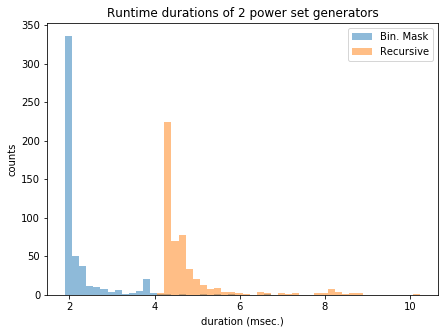

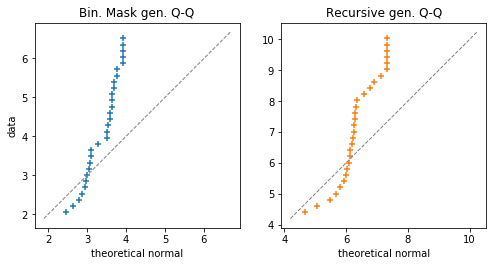

In [10]:
import nonparametric_stats as nps
plt.rcParams['figure.figsize'] = [7, 5]
durs = (10**3)*np.array([durations_bin, durations_rec])

# Obtain color cycle that matplotlib uses
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

# plot histograms of duration distributions
labels=['Bin. Mask', 'Recursive']
ax = nps.histPlotter(50, *durs, labels=labels, colors=colors)
ax.set_title('Runtime durations of 2 power set generators')
ax.set_xlabel('duration (msec.)')
ax.set_ylabel('counts')
ax.legend()

# Examine Q-Q plots to compare distributions to
# their corresponding theoretical normal dists
fig, axs = plt.subplots(nrows=1, ncols=2)
fig.tight_layout()

for i in range(0,2):
    nps.qqPlotter_normal(durs[i], 30, axes=axs[i], color=colors[i])
    axs[i].set_title(labels[i] + ' gen. Q-Q')
    axs[i].set_xlabel('theoretical normal')
    if i == 0:
        axs[i].set_ylabel('data')

The two distributions certainly do not *appear* to be normally distributed. Below, we import and run the Mann-Whitney non-parametric comparison test to assess if the difference between the two reaches statistical significance.

In [16]:
from scipy.stats import mannwhitneyu as mwu
med_bin = (10**3)*np.median(durations_bin) # compute median duration of Bin. Mask ps durations
med_rec = (10**3)*np.median(durations_rec) # compute median duration of Recursive ps durations

print('Median Bin. Mask duration: %0.2f msec., Median Recursive duration: %0.2f msec.'\
      %(med_bin, med_rec))
# Run non-parametric test to determine if differences between 
# distributions are statistically significant
uStat, pVal = mwu(durations_bin, durations_rec)
print('Mann-Whitney U statistic: %0.2f, p-value: %0.2e'%(uStat, pVal))

Median Bin. Mask duration: 1.97 msec., Median Recursive duration: 4.46 msec.
Mann-Whitney U statistic: 2260.50, p-value: 2.02e-159


Measuring the time elapsed for each of the two approaches, we find that, on average, our recursive algorithm does indeed take about twice the time to complete on our machine as the binary-mask method ({{print('%0.2f'%med_rec)}} ms versus {{print('%0.2f'%med_bin)}} ms, U = {{print('%0.2f'%uStat)}}, p < 0.01). Of course, ours is certainly not a very controlled comparison; so please take the result with "a grain of salt" if you will.

<div id="Summary-main"><h2>Summary</h2></div>

In <a href="https://nullexit.org/blog/index.php/2021/01/27/power-sets-in-python-an-object-oriented-approach-part-1/">part one</a> we discussed power sets and their relation to the binary theorem. In addition, we mapped out a recursive procedure for generating the power set. A brief investigation revealed that Python's `set()` class could not accommodate our need to include subsets within a set as in the case of power sets.  To solve the problem, we introduced a custom container class with a set-valued attribute, whose instances are "hashable" and thus, eligible for membership in `set` objects.

Starting with the container strategy from part one, in <a href="https://nullexit.org/blog/index.php/2021/01/27/power-sets-in-python-an-object-oriented-approach-part-2/">part two</a> we expanded our custom class, `ModSet()`, to include methods that perform copying, nesting, uniqueness-filtering, set-union and set-difference operations as well as others. We verified that all `ModSet()` methods functioned as desired.  Many of the methods added would prove necessary for both methods of power set generation to follow.

In <a href="https://nullexit.org/blog/index.php/2021/01/29/power-sets-in-python-an-object-oriented-approach-part-3/">part three</a>, we realized our goal of generating power sets. First, we detailed program flow of both the Binary Mask and Recursive approaches of power set generation. The mask routine used list indexing and took more lines of code than recursive method, but called fewer class methods.  Our Recursive approach was shorter in terms of lines of code because it incorporated more sibling methods of the `ModSet()` class. Explaining its program flow was "interesting" to the least; with effort on the part of the reader, it *might* strengthen understanding of recursive algorithms. Without effort, it has potential to confuse.  Finally, we compared relative run times of the two approaches. It turned out that, as expected, the Binary Mask routine took less time to run than its recursive counterpart.

<div id="Sources-(part-3)-main"><h2>Sources (part 3)</h2></div>

<a name="ref1">1.</a> D. Van Dalen; H. C. Doets; H. De Swart (9 May 2014). <a href="https://books.google.com/books?id=PfbiBQAAQBAJ&pg=PA1#v=onepage&q&f=false">Sets: Naïve, Axiomatic and Applied: A Basic Compendium with Exercises for Use in Set Theory for Non Logicians, Working and Teaching Mathematicians and Students</a>. Elsevier Science. ISBN 978-1-4831-5039-0.

<a name="ref2">2.</a> <a href="https://en.wikipedia.org/wiki/Recursion_(computer_science)#Recursion_versus_iteration">Recursion (computer science), Recursion versus Iteration</a>,  Wikipedia.

<div id="The-complete-ModSet()-class-main"><h2>The complete ModSet() class</h2></div>

You can download `ModSet()`'s complete definition from github: <a href="https://github.com/rweaton/NullExitBlogPosts/blob/main/PowersetGenerationPost/modset.py">modset.py</a>

In [1]:
class ModSet():
    
    # Instance constructor
    def __init__(self, setElement):
        self.val = setElement  # set arg saved in .val attribute
    
    # String eval representation of self instance 
    def __repr__(self):
        return self.val.__repr__() # Return string eval represent.
                                   # of string object in .val
    
    # Method to make a copy of self instance
    def __copy__(self):
        return ModSet(self.val)
    
    # Modify .val to contain the set of itself, of itself, ...
    # nesting .val "depth" number of levels.
    def pushDown(self, depth):
        while depth > 0:
            self.val = set([ModSet(self.val)])
            depth -= 1     
    
    # Remove one nesting level from set in self.val.
    # If un-nested, ignore.
    def pullUpOneLevel(self):
        listSet = list(self.val)
        if len(listSet) == 1:
            self.val = listSet[0].val
        else:
            pass
    
    # Remove "height" nesting levels from set in
    # self.val by repeatedly calling above method
    def pullUp(self, height):
        while height > 0:
            self.pullUpOneLevel()
            height -= 1
    
    # Within a single set, multiple ModSets with 
    # equivalent .val attributes can exist.  
    # This can occur because each instance of ModSet
    # allocated its own location in memory. For sets
    # to have unique members in terms of ModSet.val
    # values, we define the following filtering method.
    def removeDuplicates(self):
        uniqueSet = set()  # initialize as empty the unique set to be built
        for s in self.val:  # s is a member of the ModSet().val set
            inUniqueSet = False  # initialize match detection flag as false
            sTest = s  # default conditional testing value for s
            for us in uniqueSet: # us is a member of the uniqueSet set
                usTest = us  # default conditional testing value for us
                if isinstance(us, ModSet): # if member us is a ModSet
                    usTest = us.val        # change testing value to its attribute
                if isinstance(s, ModSet):  # if member s is a ModSet
                    sTest = s.val          # change testing value to its attribute
                if usTest == sTest:  # compare us and s testing values on this run
                    inUniqueSet = True  # if match, set existence flag to true
            if not inUniqueSet:    # only add member s to uniqueSet if
                uniqueSet.add(s)   # match is NOT detected
        self.val = uniqueSet    # set .val to the uniqueSet from above
    
    # union join multiple items, enforce that ModSet members be unique
    def union(self, *modSets):
        for modSet in modSets:
            self.val = self.val.union(modSet.val)  # this is union method from set class
            self.removeDuplicates()  # removes duplicate-valued instances of ModSet members
    
    # set intersect multiple items
    def intersection(self, *modSets):
        for modSet in modSets:
            self.val = self.val.intersection(modSet.val)
    
    # set difference multiple items. note: arg order matters here! 
    def difference(self, *modSets):
        for modSet in modSets:
            self.val = self.val.difference(modSet.val)
    
    # version of above method that returns a new instance,
    # only takes two arguments.
    def diffFunc(modSet1, modSet2):
        return ModSet(set.difference(modSet1.val, modSet2.val))
    
    # Generate powerset via direct, binary mask approach
    def powerSet_bin(self):
        
        ## Initialize local variables ##
        S = list(self.val)         # convert to list for indexing
        setSize = len(self.val)    # count number of members in source set
        psetSize = pow(2, setSize) # calculate the number of elements in the power set
        lastIndex = setSize - 1    # index value of last member
        setIndices = range(0, setSize)  # make indices list for source set
        psetIndices = range(0, psetSize) # make indices list for power set to be built
        bMasks = [[False for s in setIndices] for p in psetIndices] # Initialize binary mask       
        pSet = ModSet(set())  # initialize power set as empty ModSet() instance
        pSet.pushDown(1)  # and nest it down one level for later joining
        
        ## Populate powerset with each subset, one at a time ##
        for i in psetIndices: # loop through each member of power set
            
            ## Generate binary mask for subset i of power set ##
            val = i  # assign current pSet index as current "value" of mask 
            for j in setIndices: # loop through each bit-digit of mask
                
                if (val >= pow(2, lastIndex - j)):  # if mask value >= value of current bit,
                    bMasks[i][lastIndex - j] = True # then set corresp. mask bit to "true"
                    val -= pow(2, lastIndex - j)    # subtract value of current bit from
                                                    # mask value to determine next bit-digit
            ## Form subset i of power set ##
            # Use generator expression for compactness
            dummySet = ModSet(set([S[k] for k in setIndices if bMasks[i][k] == True]))
            dummySet.pushDown(1)  # nest ModSet instance down one level for union join
            pSet.union(dummySet)  # include new subset in power set
            
        return pSet, bMasks  # return complete power set and binary masks as output
    
    # Generate powerset recursively.
    def powerSet_rec(self):
        
        pSet = self.__copy__()      # Preserve self instance; its copy, pSet
                                    # will be altered
        pSet.pushDown(1)            # Nest pSet for later joining.
              
        if len(self.val) > 0:       # Recursion termination condition
            for elSet in self.val:  # Iterate through members of set self.val
                # Generate subset that remains after removing current
                # element, elSet, from set self.val
                dummySet = self.diffFunc(ModSet(set([elSet]))) 
                # To current powerset, append the powerset of the
                # subset from previous step
                pSet.union(dummySet.powerSet_rec())  # Self-call powerset method,
                                                     # union join powerset of 
                                                     # dummySet with pSet
            return pSet             # Return powerset at current 
                                    # level of recursion
        else:
            dummySet = ModSet(set())  # Generate instance of ModSet of empty set
            dummySet.pushDown(1)      # Nest empty set down one level so it can
            return dummySet           # be union joined in the recursion level
                                      # above that called this run-through.